In [1]:
from pathlib import Path
import pickle
import matplotlib as mpl
import mplhep
mpl.style.use(mplhep.style.ROOT)
import matplotlib.pyplot as plt
import hist
import upldmx
import awkward as ak
import numpy as np
import uproot

In [51]:
from position import samples, title_bar
events = upldmx.arrays(samples['calib-8gev']['filepath'])

In [52]:
muons = events.SimParticles[abs(events.SimParticles.pdgID)==13]
correct_num_muons = ak.num(muons.track_id)==2

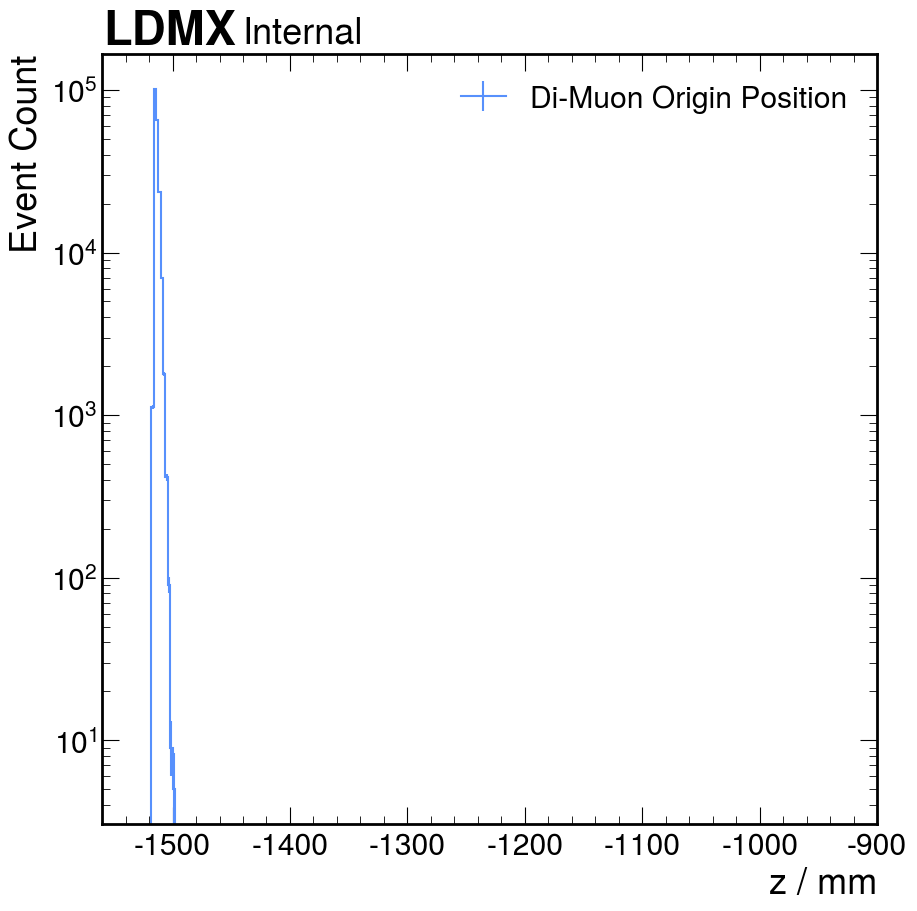

In [53]:
(
    hist.Hist.new
    .Reg(300,-930-600,-930,label='z / mm')
    .Double()
).fill(
    muons[correct_num_muons].vertex.z[:,0]
).plot(
    flow='show',
    label='Di-Muon Origin Position'
)
plt.yscale('log')
plt.ylabel('Event Count')
plt.legend()
title_bar()